# Cross-Sectional Regression

In [1]:
from empfin import CrossSectionReg, ff25p, ff5f

We can use this model wheter our factor are excess returns or not. Let us start by reading the Fama-French dataset, the 5 factors and 25 double-sorted portfolios.

In [2]:
ports = ff25p()
facts, _ = ff5f()

Let's start with a **single-factor model**, the market model.

The first stage of the cross-sectional regression is a timeseries regression. In the first stage, for each test asset $i$, we run the following regression

$$
R_{i,t} = a_i + \beta_i R_{mkt,t} + \varepsilon_{i,t}
$$

This first stage gives us the estimates of $\beta$ The second stage is the cross-section regression itself. We run a single regression with all the $N$ test assets as the observations:

$$
E_{T}\left(R_{i,t}\right)=\beta E_{T}\left(R_{mkt,t}\right)+\alpha_{i}
$$

where $E_{T}\left(\cdot\right)$ represents the average over time.

In [3]:
cs_reg_mkt = CrossSectionReg(
    assets=ports,
    factors=facts["Mkt-RF"],
    cs_const=False,  # No intercept in the second stage
)

The attribute `betas` gives us the coefficients estimated in the first stage.

<Axes: >

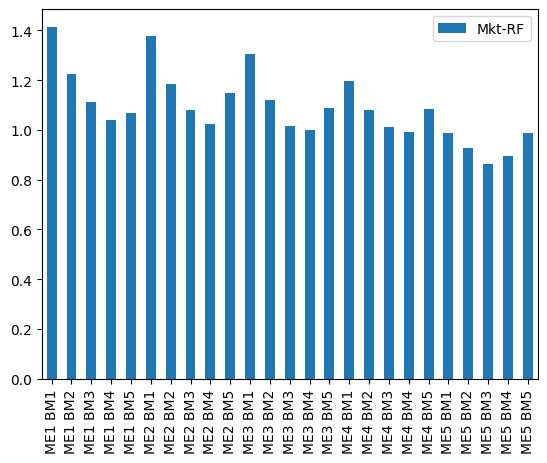

In [4]:
cs_reg_mkt.betas.T.plot(kind="bar")

The attribute `lambdas` gives the estimates of risk premia for the factors.

In [5]:
cs_reg_mkt.lambdas

Mkt-RF    0.665631
dtype: float64

We can run the Gibbons-Ross-Shanken test to evaluate if all alphas (the pricing errors of the second stage) are jointly equal to zero.

$$
H_0: \alpha_i = 0 \quad \forall i
$$

In [6]:
grs, pval = cs_reg_mkt.grs_test()
print(f"The GRS stat is {round(grs, 4)} with a p-value of {pval}")

The GRS stat is 97.0513 with a p-value of 9.518574817235503e-11


The `CrossSectionReg` class has a summary chart to better visualize the estimates of $\alpha$, $\lambda$ and compare the realized average excess return of the test assets with those predicted by the factor model.

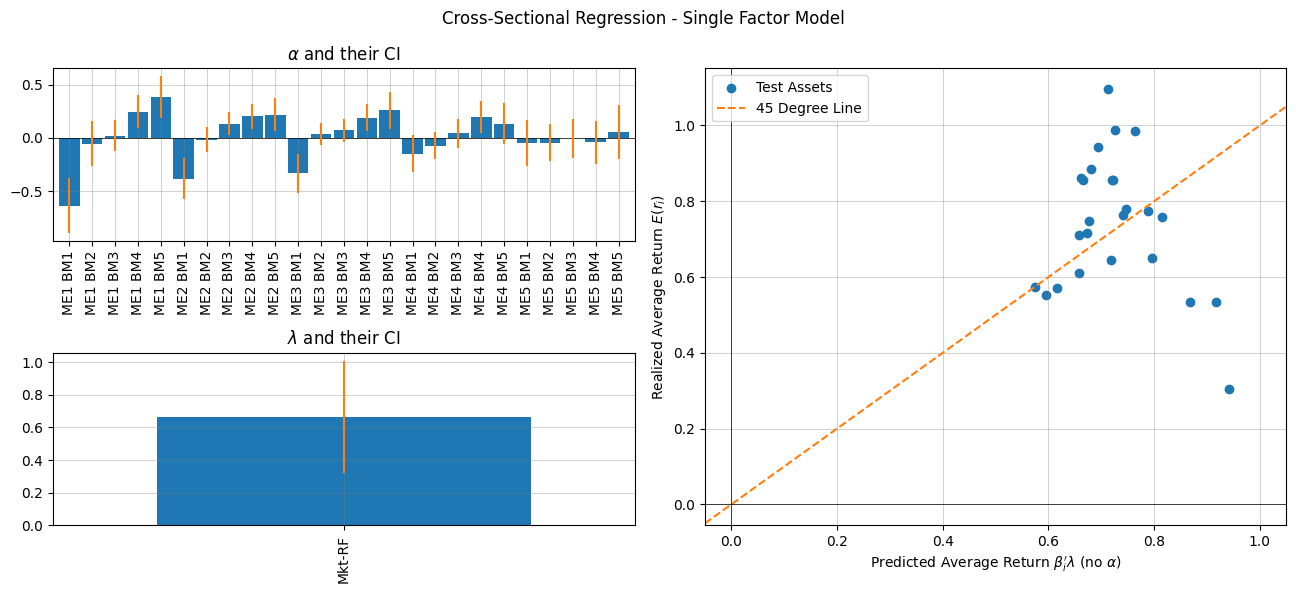

In [7]:
cs_reg_mkt.plot_alpha_pred(title="Cross-Sectional Regression - Single Factor Model")

Now run the same thing, but using the **5 factors** from the Fama-French dataset.

In [8]:
cs_reg_5f = CrossSectionReg(
    assets=ports,
    factors=facts,
    cs_const=False,  # No intercept in the second stage
)

In [9]:
grs, pval = cs_reg_5f.grs_test()
print(f"The GRS stat is {round(grs, 4)} with a p-value of {pval}")

The GRS stat is 68.9731 with a p-value of 2.6770666539110977e-07


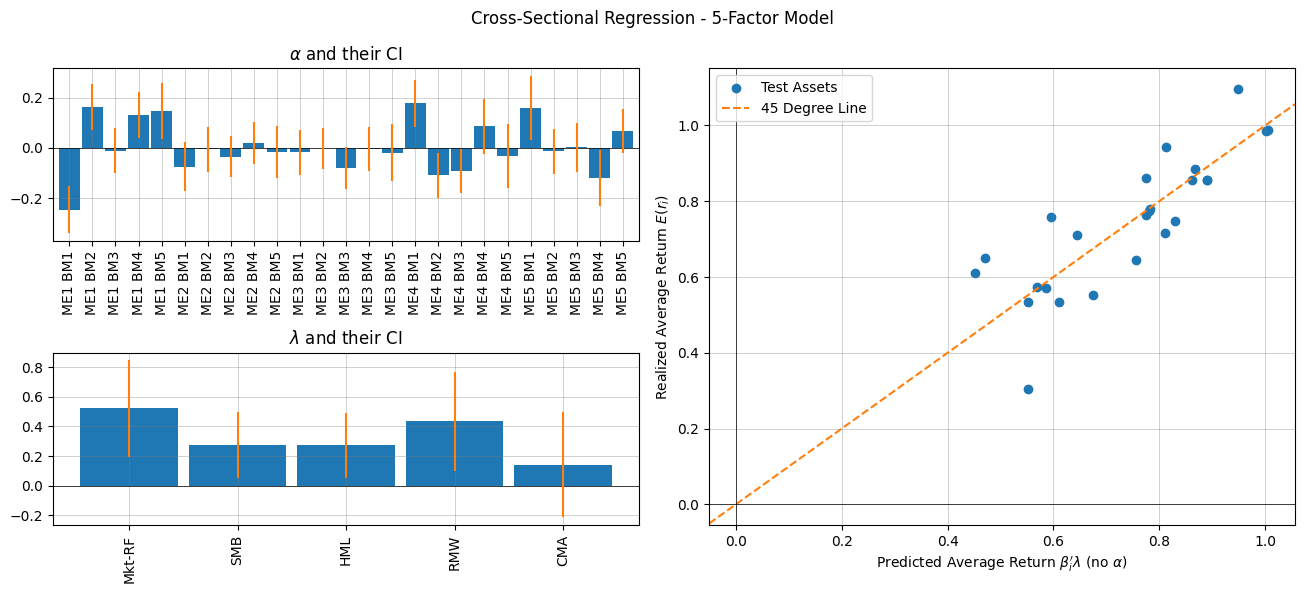

In [10]:
cs_reg_5f.plot_alpha_pred(title="Cross-Sectional Regression - 5-Factor Model")